# Modelling & Simulation

---

# Table of Contents

* [System Requirements (Part 1)](#System-Requirements)
  * [Model Introduction](#Model-Introduction)
  * [Requirements Analysis](#Requirements-Analysis) <!-- [Toy Model Introduction](#Toy-Model-Introduction:-An-Ecosystem-Model) [Some Context: Lotka & Volterra](#Some-Context:-Lotka-&-Volterra)-->
  * [Visual System Mapping: Entity Relationship Diagram](#Visual-System-Mapping:-Entity-Relationship-Diagram)
  * [Visual System Mapping: Stock & Flow Diagram](#Visual-System-Mapping:-Stock-&-Flow-Diagram)
  * [Mathematical Specification](#Mathematical-Specification)
* [System Design (Part 2)](#System-Design)
  * [Differential Specification](#Differential-Specification)
  * [cadCAD Standard Notebook Layout](#cadCAD-Standard-Notebook-Layout)
    0. [Dependencies](#0.-Dependencies)
    1. [State Variables](#1.-State-Variables)
    2. [System Parameters](#2.-System-Parameters)
    3. [Policy Functions](#3.-Policy-Functions)
    4. [State Update Functions](#4.-State-Update-Functions)
    5. [Partial State Update Blocks](#5.-Partial-State-Update-Blocks)
    6. [Configuration](#6.-Configuration)
    7. [Execution](#7.-Execution)
    8. [Simulation Output Preparation](#8.-Simulation-Output-Preparation)
    9. [Simulation Analysis](#9.-Simulation-Analysis)
* [System Validation (Part 3)](#System-Validation)
    * [Policy Functions](#Policy-Functions)
    * [Model Improvements](#Model-Improvements)
      * [Differential Specification Updates](#Differential-Specification-Updates)
      * [Mathematical Specification Updates](#Mathematical-Specification-Updates)
    * [Model Limitations](#Model-Limitations)

<!--
* [Toy Model Introduction](#Toy-Model-Introduction:-An-Ecosystem-Model)
  * [Some Context: Lotka & Volterra](#Some-Context:-Lotka-&-Volterra)
  * [Visual System Mapping: Entity Relationship Diagram](#Visual-System-Mapping:-Entity-Relationship-Diagram)
  * [Requirements Analysis](#Requirements-Analysis)
  * [Mathematical Specification](#Mathematical-Specification)
  * [Visual System Mapping: Stock & Flow Diagram](#Visual-System-Mapping:-Stock-&-Flow-Diagram)
  * [Differential Specification](#Differential-Specification)
* [cadCAD Standard Notebook Layout](#cadCAD-Standard-Notebook-Layout)
    0. [Dependencies](#0.-Dependencies)
    1. [State Variables](#1.-State-Variables)
    2. [System Parameters](#2.-System-Parameters)
    3. [Policy Functions](#3.-Policy-Functions)
    4. [State Update Functions](#4.-State-Update-Functions)
    5. [Partial State Update Blocks](#5.-Partial-State-Update-Blocks)
    6. [Configuration](#6.-Configuration)
    7. [Execution](#7.-Execution)
    8. [Simulation Output Preparation](#8.-Simulation-Output-Preparation)
    9. [Simulation Analysis](#9.-Simulation-Analysis)
-->

---

# System Requirements

<center><img src="images/edp-phase-1.png" alt="Engineering Design Process, phase 1 - System requirements" width="60%"/>

## Model Introduction

> Ecosystem: a biological community of interacting organisms and their physical environment.

<center>
<img src="./images/ecosystem.png"
     alt="Ecosystem"
     style="width: 200px;" />
</center>

<center>
<img src="./images/lotka-volterra.png"
     alt="Lotka-Volterra"
     style="width: 60%;" />
</center>

## Requirements Analysis

[Link to Simulation Analysis](#9.-Simulation-Analysis)

Illustrative real-world model applications:
* Forecast animal food consumption, to determine the sustainability of a farming operation, and to plan for worst-case scenarios.
* Given a food supply of a number of standard crops, of varying cost, how do we optimize economic performance of the farming operation?
* Given the ecological impact of a certain crop on the fertility of the soil, how do we balance the economic performance and ecological sustainability of the farming operation?

### Questions

1. How long will our model ecosystem be able to sustain itself for?
2. What population size can our model ecosystem support?

### Assumptions

1. The population will increase over time.
2. The food supply will decrease over time.
3. There is some relationship between the population and food supply.

### Constraints / Scope

* The intention of this toy model is to allow us to learn about cadCAD, the modelling process, simulation configuration, and the engineering design process!

## Visual System Mapping: Entity Relationship Diagram
<!-- https://en.wikipedia.org/wiki/Entity%E2%80%93relationship_model -->

<center>
<img src="./images/s5-entity-relationship-diagram.png"
     alt="Entity relationship diagram"
     style="width: 60%;" />
</center>

## Visual System Mapping: Stock & Flow Diagram

<center>
<img src="./images/s5-stock-and-flow-ecosystem.png"
     alt="Stock and flow"
     style="width: 60%;" />
</center>

## Mathematical Specification

> ...differential equations play a prominent role in many disciplines including engineering, physics, economics, and biology.

### Differential Equations
* A population consumes a food source, and reproduces at a rate proportional to the food source.
* The food source is consumed at a rate proportional to the population.

\begin{align}
\large population_t &\large= population_{t-1} + {\Delta population} \quad \textrm{(sheep)} \tag{1} \\
\large food_t &\large= food_{t-1} + {\Delta food} \quad \textrm{(tons of grass)} \tag{2} \\
\end{align}

where the rate of change ($\Delta$) is:
\begin{align}
\large {\Delta population} &\large= \alpha * food_{t-1} \quad \textrm{(sheep/month)}  \\
\large {\Delta food} &\large= -\beta * population_{t-1} \quad \textrm{(tons of grass/month)}
\end{align}

# System Design

<center><img src="images/edp-phase-2.png" alt="Engineering Design Process, phase 1 - System design" width="60%"/>

## Differential Specification

<center>
<img src="./images/s5-differential-spec-ecosystem.png"
     alt="Differential spec"
     style="width: 60%;" />
</center>

## cadCAD Standard Notebook Layout

<center>
<img src="./images/cadcad-flow.png"
     alt="cadCAD flow"
     style="width: 25%;" />
</center>

# 0. Dependencies

In [136]:
# Standard libraries: https://docs.python.org/3/library/
import math

# Analysis and plotting modules
import pandas as pd
# import plotly

In [137]:
# cadCAD configuration modules
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment

# cadCAD simulation engine modules
from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor

# 1. State Variables

> A state variable is one of the set of variables that are used to describe the mathematical "state" of a dynamical system. ([Wikipedia](https://en.wikipedia.org/wiki/State_variable))

In [138]:
initial_state = {
    'population': 50, # number of sheep
    'food': 1000 # tons of grass
}
initial_state

{'population': 50, 'food': 1000}

## **Time** as a system state

<center>
<img src="./images/discrete-time.svg"
     alt="Discrete time"
     style="width: 200px;" />
</center>

* 1 **timestep** == 1 month

# 2. System Parameters

> System parameterization is the process of choosing variables that impact the behaviour of the model. These parameters allow us to perform simulation techniques like parameter sweeps, Monte Carlo simulations, A/B tests, and see how the system behaves under a different model parameter set.

[Link to Simulation Analysis](#9.-Simulation-Analysis)

In [139]:
system_params = {
    'reproduction_rate': [0.01], # sheep per month
    'consumption_rate': [0.1], # tons of grass per month
}
system_params

{'reproduction_rate': [0.01], 'consumption_rate': [0.1]}

# 3. Policy Functions

> A Policy Function computes one or more signals to be passed to State Update Functions. They describe the logic  and behaviour of a system component  or mechanism.

We'll cover this in the next section!

# 4. State Update Functions

> We create State Update Functions to design the way our model state changes over time. These will usually represent the system differential specification.

```python
def state_update_function(params, substep, state_history, previous_state, policy_input):
    variable_value = 0
    return 'variable_name', variable_value
```

* `params` is a Python dictionary containing the **system parameters** <!-- for consistency with the previous definition -->
* `substep` is an integer value representing a step within a single `timestep`
* `state_history` is a Python list of all previous states
* `previous_state` is a Python dictionary that defines what the state of the system was at the **previous timestep** or **substep**
* `policy_input` is a Python dictionary of signals or actions from **policy functions**

In [140]:
def new_population(current_population, alpha, food_supply):
    """
    The population state after one timestep, according to the differential equation (1):
    current_population + alpha * food_supply
    """
    return math.ceil(current_population + alpha * food_supply)

In [141]:
math.ceil(5.5)

6

In [142]:
# Relevant state variables
current_population = initial_state['population']
food_supply = initial_state['food']

# Relevant parameters
reproduction_rate = system_params['reproduction_rate'][0] # "alpha" in our differential equation

new_population(current_population, reproduction_rate, food_supply)

60

In [143]:
def s_population(params, substep, state_history, previous_state, policy_input):
    """
    Update the population state according to the differential equation (1):
    current_population + alpha * food_supply
    """
    population = previous_state['population']
    alpha = params['reproduction_rate']
    food_supply = previous_state['food']
    
    return 'population', max(new_population(population, alpha, food_supply), 0)

In [144]:
population = 60
print("A tuple!")
'population', max(math.ceil(population), 0)

A tuple!


('population', 60)

In [145]:
next_state = {
    # current_population + alpha * food_supply
    'population': math.ceil(50 + 0.01 * 1000),
    'food': 1000
}
next_state

{'population': 60, 'food': 1000}

In [146]:
def s_food(params, substep, state_history, previous_state, policy_input):
    """
    Update the food supply state according to the differential equation (2):
    food supply - beta * population
    """
    food = previous_state['food'] - params['consumption_rate'] * previous_state['population']
    return 'food', max(food, 0)

In [147]:
max(-10, 0)

0

# 5. Partial State Update Blocks
## Tying it all together

> A series of Partial State Update Blocks is a structure for composing State Update Functions and Policy Functions in series or parallel, as a representation of the system model. 

<center>
<img src="./images/basic-psub.png"
     alt="Policy functions"
     style="width: 60%;" />
</center>

**Updates run in series**

In [148]:
partial_state_update_blocks = [
    # Run first
    {
        'policies': {}, # Ignore for now
        # State variables
        'variables': {
            'population': s_population
        }
    },
    # Run second
    {
        'policies': {}, # Ignore for now
        # State variables
        'variables': {
            'food': s_food
        }
    }
]

**Updates run in parallel**

In [149]:
partial_state_update_blocks = [
    {
        'policies': {}, # Ignore for now
        # State variables
        'variables': {
            # Updated in parallel
            'population': s_population,
            'food': s_food
        }
    }
]

# 6. Configuration

> The configuration stage is about tying all the previous model components together and choosing how the simulation should run.

<center>
<img src="./images/cadcad-flow.png"
     alt="cadCAD flow"
     style="width: 25%;" />
</center>

Configuration parameters:
* `'N': 1` - the number of times we'll run the simulation (you'll see them called "Monte Carlo runs" later in the course, when we look at tools to analyze system models)
* `'T': range(400)` - the number of timesteps the simulation will run for
* `'M': system_params` - the parameters of the system

In [150]:
sim_config = config_sim({
    "N": 1,
    "T": range(400),
    "M": system_params
})

In [151]:
range(400)

range(0, 400)

In [152]:
list(range(400))[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [153]:
from cadCAD import configs
del configs[:] # Clear any prior configs

In [154]:
experiment = Experiment()
experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config
)
configs[-1].__dict__

{'sim_config': {'N': 1,
  'T': range(0, 400),
  'M': {'reproduction_rate': 0.01, 'consumption_rate': 0.1},
  'subset_id': 0,
  'subset_window': deque([0, None]),
  'simulation_id': 0,
  'run_id': 0},
 'initial_state': {'population': 50, 'food': 1000},
 'seeds': {},
 'env_processes': {},
 'exogenous_states': {},
 'partial_state_updates': [{'policies': {},
   'variables': {'population': <function __main__.s_population(params, substep, state_history, previous_state, policy_input)>,
    'food': <function __main__.s_food(params, substep, state_history, previous_state, policy_input)>}}],
 'policy_ops': [<function cadCAD.configuration.Experiment.<lambda>(a, b)>],
 'kwargs': {},
 'user_id': 'cadCAD_user',
 'session_id': 'cadCAD_user=0_0',
 'simulation_id': 0,
 'run_id': 0,
 'experiment_id': 0,
 'exp_window': deque([1, 0]),
 'subset_id': 0,
 'subset_window': deque([0, None])}

# 7. Execution

> The Execution Engine takes a model and configuration, and computes the simulation output.

## Configuring the cadCAD simulation execution

In [155]:
exec_context = ExecutionContext()

In [156]:
simulation = Executor(exec_context=exec_context, configs=configs)

## Time to simulate our ecosystem model!

In [157]:
raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (400, 2, 1, 2)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.01s


# 8. Simulation Output Preparation
> The simulation results are returned as a Pandas dataframe. At this stage of the process you'll manipulate and analyze your results to answer questions about your model.

In [158]:
simulation_result = pd.DataFrame(raw_result)

In [159]:
raw_result[:5]

[{'population': 50,
  'food': 1000,
  'simulation': 0,
  'subset': 0,
  'run': 1,
  'substep': 0,
  'timestep': 0},
 {'population': 60,
  'food': 995.0,
  'simulation': 0,
  'subset': 0,
  'run': 1,
  'substep': 1,
  'timestep': 1},
 {'population': 70,
  'food': 989.0,
  'simulation': 0,
  'subset': 0,
  'run': 1,
  'substep': 1,
  'timestep': 2},
 {'population': 80,
  'food': 982.0,
  'simulation': 0,
  'subset': 0,
  'run': 1,
  'substep': 1,
  'timestep': 3},
 {'population': 90,
  'food': 974.0,
  'simulation': 0,
  'subset': 0,
  'run': 1,
  'substep': 1,
  'timestep': 4}]

In [160]:
simulation_result.head()

,population,food,simulation,subset,run,substep,timestep
0,50,1000.0,0,0,1,0,0
1,60,995.0,0,0,1,1,1
2,70,989.0,0,0,1,1,2
3,80,982.0,0,0,1,1,3
4,90,974.0,0,0,1,1,4


# 9. Simulation Analysis

[Link to System Requirements](#Requirements-Analysis)

In [161]:
pd.options.plotting.backend = "plotly"

After plotting the results, let's go and update the parameters, and then select `Cell` and `Run All Above`:

[Link to System Parameters](#2.-System-Parameters)

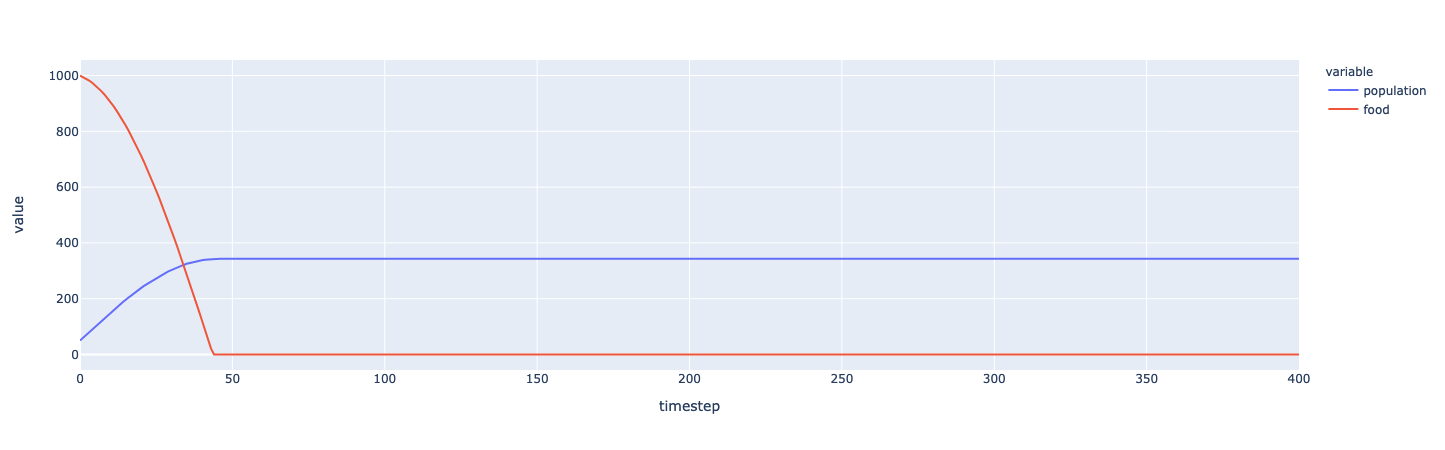

In [162]:
simulation_result.plot(
    kind='line',
    x='timestep',
    y=['population','food']
)

In [163]:
pd.set_option('display.max_rows', len(simulation_result))
display(simulation_result)
pd.reset_option('display.max_rows')

,population,food,simulation,subset,run,substep,timestep
0,50,1000.0,0,0,1,0,0
1,60,995.0,0,0,1,1,1
2,70,989.0,0,0,1,1,2
3,80,982.0,0,0,1,1,3
4,90,974.0,0,0,1,1,4
5,100,965.0,0,0,1,1,5
6,110,955.0,0,0,1,1,6
7,120,944.0,0,0,1,1,7
8,130,932.0,0,0,1,1,8
9,140,919.0,0,0,1,1,9


In [164]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
simulation_result.query('food == 0').head()

,population,food,simulation,subset,run,substep,timestep
44,343,0.0,0,0,1,1,44
45,343,0.0,0,0,1,1,45
46,343,0.0,0,0,1,1,46
47,343,0.0,0,0,1,1,47
48,343,0.0,0,0,1,1,48


# System Validation

<center><img src="images/edp-phase-3.png" alt="Engineering Design Process, phase 1 - validation" width="60%"/>

## Policy Functions

An illustrative example:

```python
condition = True

def policy_function(params, substep, state_history, previous_state):
    '''
    This logic belongs in the policy function,
    but could also have been placed directly in the state update function.
    '''
    signal_value = 1 if condition else 0
    return {'signal_name': signal_value}
```

```python
def state_update_function(params, substep, state_history, previous_state, policy_input):
    state_value = policy_input['signal_name']
    return 'state_name', state_value
```

<center>
<img src="./images/basic-psub.png"
     alt="Policy functions"
     style="width: 60%;" />
</center>

<center>
<img src="./images/policy-explainer.png"
     alt="Policy functions"
     style="width: 60%;" />
</center>

### Policy Aggregation

<center>
<img src="./images/policy-aggregation-explainer.png"
     alt="Policy functions"
     style="width: 60%;" />
</center>

## Model Improvements

### Differential Specification Updates

<center>
<img src="./images/s5-differential-spec-ecosystem-policy-refactor.png"
     alt="Differential spec"
     style="width: 60%;" />
</center>

State update functions `s_population()` and `s_food()` from the last part:

In [165]:
def s_population(params, substep, state_history, previous_state, policy_input):
    population = previous_state['population'] + params['reproduction_rate'] * previous_state['food']
    return 'population', max(math.ceil(population), 0)

def s_food(params, substep, state_history, previous_state, policy_input):
    food = previous_state['food'] - params['consumption_rate'] * previous_state['population']
    return 'food', max(food, 0)

Adapting to use **policy functions** to drive the process, and **state update functions** to update the state according to the **differential specification**:

In [166]:
def p_reproduction(params, substep, state_history, previous_state):
    population_reproduction = params['reproduction_rate'] * previous_state['food']
    return {'delta_population': population_reproduction}

def p_consumption(params, substep, state_history, previous_state):
    food_consumption = params['consumption_rate'] * previous_state['population']
    return {'delta_food': -food_consumption}

In [167]:
def s_population(params, substep, state_history, previous_state, policy_input):
    population = previous_state['population'] + policy_input['delta_population'] 
    return 'population', max(math.ceil(population), 0)

def s_food(params, substep, state_history, previous_state, policy_input):
    food = previous_state['food'] + policy_input['delta_food'] 
    return 'food', max(food, 0)

### Mathematical Specification Updates

\begin{align}
\large population_t &\large= population_{t-1} + {\Delta population} \quad \textrm{(sheep)} \tag{1} \\
\large food_t &\large= food_{t-1} + {\Delta food} \quad \textrm{(tons of grass)} \tag{2}
\end{align}

where the rate of change ($\Delta$) is:
\begin{align}
\large {\Delta population} &\large= \alpha * food_{t-1} \quad \textrm{(sheep/month)} \\
\large {\Delta food} &\large= -\beta * population_{t-1} + \gamma \quad \textrm{(tons of grass/month)}
\end{align}

where:

$
\begin{align}
\alpha: \quad &\textrm{'reproduction_rate'}\\
\beta: \quad &\textrm{'consumption_rate'}\\
\gamma: \quad &\textrm{'growth_rate'}
\end{align}
$

* A population consumes a food source, and reproduces at a rate proportional to the food source $\alpha$ (alpha).
* The food source is consumed at a rate proportional to the population $\beta$ (beta), and grows at a constant rate $\gamma$ (gamma).

<center>
<img src="./images/s6-differential-spec-ecosystem-with-gamma.png"
     alt="Diff spec"
     style="width: 60%" />
</center>

In [168]:
initial_state = {
    'population': 50, # number of sheep
    'food': 1000 # tons of grass
}

system_params = {
    'reproduction_rate': [0.01], # number of sheep / month
    'consumption_rate': [0.01], # tons of grass / month
    'growth_rate': [10.0], # tons of grass / month
}

In [169]:
from collections import Counter

In [170]:
A = Counter({'delta_food': 5, 'delta_population': 10})
B = Counter({'delta_food': 5})
A + B

Counter({'delta_food': 10, 'delta_population': 10})

In [171]:
A = Counter({'delta_food': 5, 'delta_population': 10})
B = Counter({'delta_food': -2})
A + B

Counter({'delta_food': 3, 'delta_population': 10})

In [172]:
def p_growth(params, substep, state_history, previous_state):
    delta_food = params['growth_rate']
    return {'delta_food': delta_food}

In [173]:
partial_state_update_blocks = [
    {
        'policies': {
            'reproduction': p_reproduction,
            'consumption': p_consumption, # Signal: `delta_food`
            'growth': p_growth # Signal: `delta_food`
        },
        'variables': {
            'population': s_population,
            'food': s_food # Receives policy_input of (consumption + growth) as `delta_food`
        }
    }
]

In [174]:
del configs[:]

sim_config = config_sim({
    'N': 1,
    'T': range(400),
    'M': system_params
})

experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config
)

In [175]:
exec_context = ExecutionContext()

simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (400, 3, 1, 2)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [1]
Execution Mode: single_threaded
Total execution time: 0.02s


In [176]:
simulation_result = pd.DataFrame(raw_result)
simulation_result

,population,food,simulation,subset,run,substep,timestep
0,50,1000.00,0,0,1,0,0
1,60,1009.50,0,0,1,1,1
2,71,1018.90,0,0,1,1,2
3,82,1028.19,0,0,1,1,3
4,93,1037.37,0,0,1,1,4
...,...,...,...,...,...,...,...
396,2433,0.00,0,0,1,1,396
397,2433,0.00,0,0,1,1,397
398,2433,0.00,0,0,1,1,398
399,2433,0.00,0,0,1,1,399


In [177]:
df = simulation_result.copy()
df = df[df.simulation == 0]
df

,population,food,simulation,subset,run,substep,timestep
0,50,1000.00,0,0,1,0,0
1,60,1009.50,0,0,1,1,1
2,71,1018.90,0,0,1,1,2
3,82,1028.19,0,0,1,1,3
4,93,1037.37,0,0,1,1,4
...,...,...,...,...,...,...,...
396,2433,0.00,0,0,1,1,396
397,2433,0.00,0,0,1,1,397
398,2433,0.00,0,0,1,1,398
399,2433,0.00,0,0,1,1,399


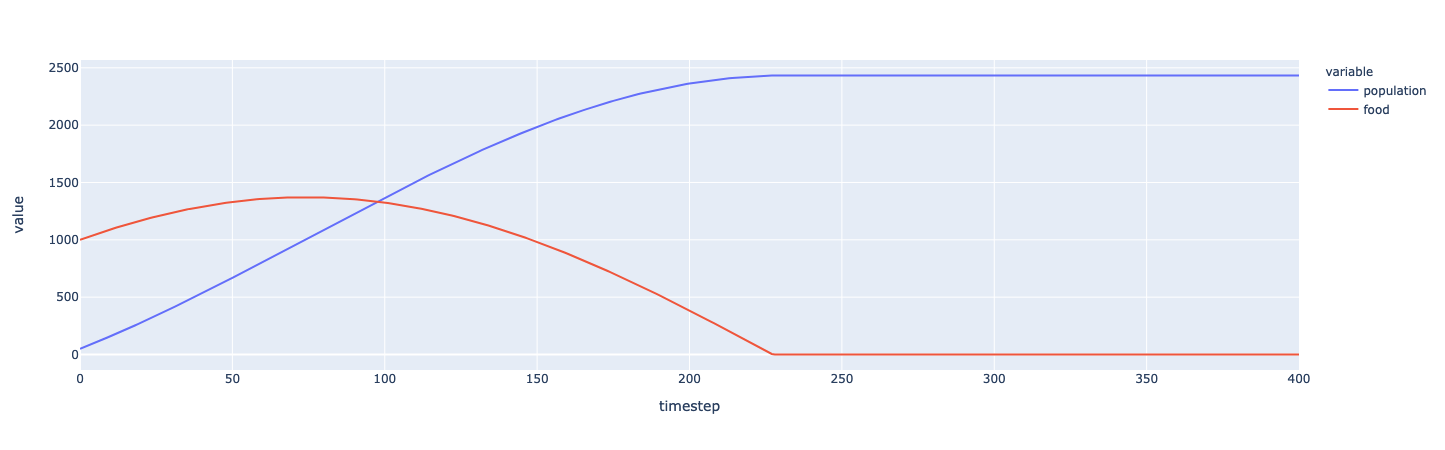

In [178]:
df.plot(kind='line', x='timestep', y=['population','food'])

In [179]:
df = df[['population', 'food']]
df.head()

,population,food
0,50,1000.00
1,60,1009.50
2,71,1018.90
3,82,1028.19
4,93,1037.37


In [180]:
df.pct_change()

,population,food
0,NaN,NaN
1,0.200000,0.009500
2,0.183333,0.009312
3,0.154930,0.009118
4,0.134146,0.008928
...,...,...
396,0.000000,NaN
397,0.000000,NaN
398,0.000000,NaN
399,0.000000,NaN


In [181]:
diff = df.diff()
diff

,population,food
0,NaN,NaN
1,10.0,9.50
2,11.0,9.40
3,11.0,9.29
4,11.0,9.18
...,...,...
396,0.0,0.00
397,0.0,0.00
398,0.0,0.00
399,0.0,0.00


In [182]:
diff = diff.query('food <= 0')
diff

,population,food
75,14.0,-0.05
76,14.0,-0.19
77,14.0,-0.33
78,14.0,-0.47
79,14.0,-0.61
...,...,...
396,0.0,0.00
397,0.0,0.00
398,0.0,0.00
399,0.0,0.00


In [183]:
df.iloc[75]

population    1019.00
food          1371.25
Name: 75, dtype: float64

## Model Limitations

1. The population never dies.
2. The system reaches a steady state of no population or food supply change.

#### Addition of a population death rate, "epsilon" / $\epsilon$, that's dependent on the population size:
<br>

\begin{align}
\large population_t &\large= population_{t-1} + {\Delta population} \quad \textrm{(sheep)} \tag{1} \\
\large food_t &\large= food_{t-1} + {\Delta food} \quad \textrm{(tons of grass)} \tag{2}
\end{align}

where the rate of change ($\Delta$) is:
\begin{align}
\large {\Delta population} &\large= \alpha * food_{t-1} - \epsilon * population_{t-1} \quad \textrm{(sheep/month)} \\
\large {\Delta food} &\large= -\beta * population_{t-1} + \gamma \quad \textrm{(tons of grass/month)}
\end{align}

where:

$
\begin{align}
\alpha: \quad &\textrm{'reproduction_rate'}\\
\epsilon: \quad &\textrm{'death_rate'}\\
\beta: \quad &\textrm{'consumption_rate'}\\
\gamma: \quad &\textrm{'growth_rate'}\\
\end{align}
$

* A population consumes a food source, and reproduces at a rate proportional to the food source $\alpha$ (alpha), and dies at a rate proportional to the population size $\epsilon$ (epsilon).
* The food source is consumed at a rate proportional to the population $\beta$ (beta), and grows at a constant rate $\gamma$ (gamma).

<center>
<img src="./images/s6-differential-spec-ecosystem-final.png"
     alt="Diff spec"
     style="width: 60%" />
</center>

In [184]:
def p_death(params, substep, state_history, previous_state):
    population_death = params['death_rate'] * previous_state['population']
    return {'delta_population': -population_death}

In [185]:
initial_state = {
    'population': 50, # number of sheep
    'food': 1000 # tons of grass
}

system_params = {
    'reproduction_rate': [0.01],
    'death_rate': [0.01],
    'consumption_rate': [0.01],
    'growth_rate': [10.0],
}

In [186]:
partial_state_update_blocks = [
    {
        'policies': {
            'reproduction': p_reproduction,
            'death': p_death,
            'consumption': p_consumption,
            'growth': p_growth
        },
        'variables': {
            'population': s_population,
            'food': s_food
        }
    }
]

In [187]:
sim_config = config_sim({
    'N': 1,
    'T': range(1000),
    'M': system_params
})

experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config
)

In [188]:
exec_context = ExecutionContext()

simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (400, 3, 1, 2)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [1, 2]
Execution Mode: parallelized
Total execution time: 0.19s


In [189]:
simulation_result = pd.DataFrame(raw_result)

In [190]:
df = simulation_result.copy()
df = df[df.simulation == 1]
df

,population,food,simulation,subset,run,substep,timestep
401,50,1000.00,1,0,1,0,0
402,60,1009.50,1,0,1,1,1
403,70,1018.90,1,0,1,1,2
404,80,1028.20,1,0,1,1,3
405,90,1037.40,1,0,1,1,4
...,...,...,...,...,...,...,...
1397,995,994.99,1,0,1,1,996
1398,995,995.04,1,0,1,1,997
1399,996,995.09,1,0,1,1,998
1400,996,995.13,1,0,1,1,999


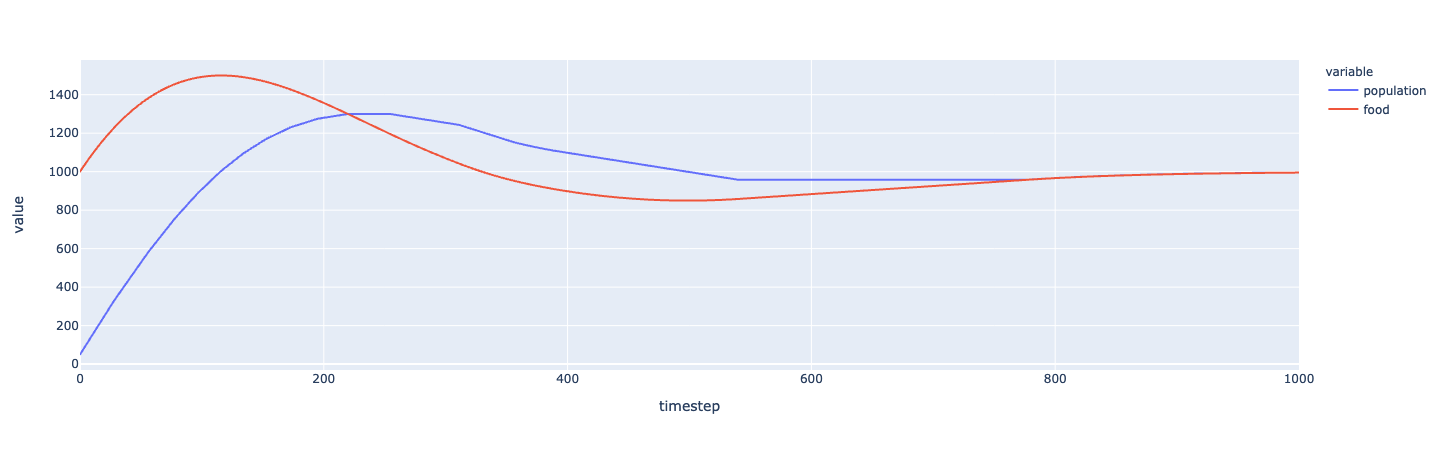

In [191]:
df.plot(kind='line', x='timestep', y=['population','food'])

<br/><br/><br/>
# Well done!
<br/><br/><br/><br/>